# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import plotly.graph_objects as go
from statsmodels.tsa.arima_model import ARIMA
from random import random
import joblib
from pandas import Series


In [14]:
!pip3 install joblib

In [9]:
confirmed_df = pd.read_csv('dataset_final.csv')
confirmed_df.head()

confirmed_df = confirmed_df.groupby("Province/State").sum().reset_index()
print("DONE 1")
Country_confirmed =  confirmed_df["Province/State"].values
print("DONE 2")
confirmed_df = confirmed_df.drop(['Province/State'], axis=1)
print("DONE 3")
confirmed_df = confirmed_df[confirmed_df.columns].T
print("DONE 4")
confirmed_df.columns = Country_confirmed
print("DONE 5")
Date_index = confirmed_df.index
print("DONE 6")
confirmed_df = confirmed_df.diff().fillna(0)
print("DONE 7")
confirmed_df = confirmed_df.abs()
print("DONE 8")
confirmed_df.head()


DONE 1
DONE 2
DONE 3
DONE 4
DONE 5
DONE 6
DONE 7
DONE 8


,AB,AG,AR,B,BC,BH,BN,BR,BT,BV,...,SB,SJ,SM,SV,TL,TM,TR,VL,VN,VS
04/03/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04/04/2020,2.0,2.0,18.0,6.0,3.0,2.0,1.0,2.0,4.0,3.0,...,0.0,2.0,1.0,101.0,0.0,10.0,3.0,1.0,0.0,0.0
04/05/2020,18.0,11.0,22.0,2.0,11.0,0.0,14.0,0.0,20.0,4.0,...,22.0,3.0,6.0,248.0,0.0,40.0,0.0,1.0,9.0,2.0
04/06/2020,1.0,2.0,7.0,14.0,1.0,6.0,16.0,0.0,16.0,7.0,...,6.0,2.0,4.0,13.0,0.0,5.0,9.0,0.0,0.0,1.0
04/07/2020,16.0,4.0,4.0,32.0,8.0,3.0,12.0,1.0,2.0,18.0,...,14.0,1.0,2.0,94.0,0.0,10.0,1.0,1.0,0.0,1.0


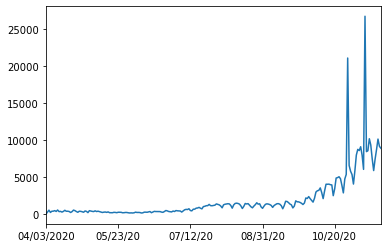

In [10]:
covid_cases = confirmed_df.sum(axis=1)
covid_cases.plot()

In [11]:
ratio_B = confirmed_df["BR"]/covid_cases*100


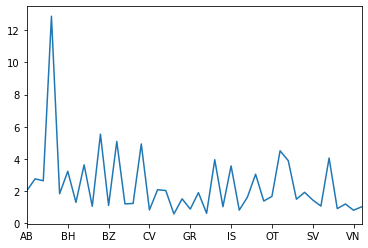

In [12]:
ratio_counties_avg = confirmed_df[-14:].transform(lambda row: 100 * row / row.sum(), axis=1).mean()
ratio_counties_avg.plot()

# Scalling the data

In [13]:
covid_cases

04/03/2020        0.0
04/04/2020      253.0
04/05/2020      510.0
04/06/2020      197.0
04/07/2020      362.0
               ...   
11/17/20       7407.0
11/18/20       8709.0
11/19/20      10117.0
11/20/20       9140.0
11/21/20       8879.0
Length: 233, dtype: float64

In [12]:
!pip3 install statsmodels==0.11.1

     |████████████████████████████████| 8.7 MB 6.2 MB/s eta 0:00:01
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.1
    Uninstalling statsmodels-0.12.1:
      Successfully uninstalled statsmodels-0.12.1


In [19]:
!pip3 show scikit-learn

Name: scikit-learn
Version: 0.22.2.post1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: Andreas Mueller
Author-email: amueller@ais.uni-bonn.de
License: new BSD
Location: /usr/lib/python3/dist-packages
Requires: 
Required-by: sklearn


In [14]:
# fit model
model = ARIMA(covid_cases.values, order=(2, 0, 2))
model_fit = model.fit(disp=False)
# make prediction



LinAlgError: SVD did not converge

In [15]:
yhat = model_fit.predict(209, 215)
#pd.yhat.plot()
print(yhat)

NameError: name 'model_fit' is not defined

In [45]:
prediciton = yhat

In [104]:
ratio_counties_avg

AB     2.848654
AG     1.270436
AR     2.378055
B     15.906584
BC     2.928407
BH     2.912209
BN     1.039490
BR     0.825975
BT     1.518852
BV     3.356459
BZ     1.045275
CJ     5.721886
CL     0.768752
CS     1.027698
CT     2.378197
CV     0.842985
DB     2.195041
DJ     3.234926
GJ     0.758184
GL     1.642391
GR     0.582155
HD     1.645108
HR     2.031025
IF     2.622706
IL     0.751448
IS     4.891809
MH     0.652249
MM     2.414405
MS     3.193490
NT     2.204864
OT     1.751411
PH     3.519590
SB     2.517236
SJ     1.735362
SM     0.960118
SV     2.480556
TL     0.445096
TM     4.968670
TR     1.521318
VL     2.390813
VN     0.598021
VS     1.522095
dtype: float64

pandas.core.series.Series

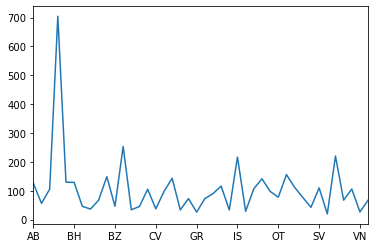

In [115]:
counties_prediction = ratio_counties_avg*prediciton[6]/100
counties_prediction.plot()

In [48]:
print(counties_prediction)

AB    126.147688
AG     56.259050
AR    105.308042
B     704.395387
BC    129.679400
BH    128.962112
BN     46.032015
BR     36.576871
BT     67.259728
BV    148.634923
BZ     46.288175
CJ    253.383751
CL     34.042833
CS     45.509832
CT    105.314303
CV     37.330133
DB     97.203552
DJ    143.253049
GJ     33.574870
GL     72.730418
GR     25.779732
HD     72.850730
HR     89.940413
IF    116.141964
IL     33.276570
IS    216.625225
MH     28.883693
MM    106.917738
MS    141.418144
NT     97.638563
OT     77.558195
PH    155.858905
SB    111.471417
SJ     76.847501
SM     42.517136
SV    109.847085
TL     19.710280
TM    220.028896
TR     67.368915
VL    105.872993
VN     26.482307
VS     67.403332
dtype: float64


In [22]:
joblib.dump(model, 'test_model')

['test_model']

In [51]:
loaded_model = joblib.load('test_model')
model_fit2 = loaded_model.fit(disp=False)
pred = model_fit2.predict(209, 215)
print(pred)

[4560.98605086 4456.778208   4448.14081769 4443.06961569 4438.14121728
 4433.22822109 4428.32586521]


In [70]:
#vg = ratio_counties_avg.values.tolist()


f = open("ratio.txt", "w")

f.write(str(ratio_counties_avg))
    
    
f.close()


[2.8486541272364527, 1.270436085830288, 2.378055387008979, 15.906584294560883, 2.9284068924158477, 2.9122091770978495, 1.0394902316871533, 0.8259751444054084, 1.5188522792231252, 3.356458560937902, 1.045274824791037, 5.72188583711798, 0.7687517649457366, 1.0276983583666996, 2.3781967777589528, 0.8429852288269594, 2.1950406339718715, 3.2349256425713375, 0.7581842710551693, 1.6423908273170007, 0.5821552606543615, 1.6451077137917063, 2.0310251727719257, 2.622705905918617, 0.7514480911568107, 4.891808597959062, 0.6522485872606515, 2.4144053714042326, 3.1934899989466783, 2.204864010846891, 1.7514111930939047, 3.519589785500659, 2.517236091245766, 1.735362376198545, 0.9601176069606489, 2.4805556055554554, 0.4450955188975604, 4.968669928586547, 1.5213179312378493, 2.3908130593185075, 0.598020730778356, 1.5220951147886328]


In [77]:
f2 = open("ratio.txt", "r")
avg_smth = f2.read()
serie = pd.Series(avg_smth)

print(serie)

0    AB     2.848654\nAG     1.270436\nAR     2.378...
dtype: object


In [123]:
ratio_counties_avg.to_csv('ratios.csv')
pnm = pd.read_csv('ratios.csv')

series1=pnm.iloc[:,:]
series2 = pd.Series(series1)


<ipython-input-123-abd751410a96>:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  ratio_counties_avg.to_csv('ratios.csv')


ValueError: Wrong number of items passed 2, placement implies 41

In [105]:
series1

,AB,2.8486541272364527
0,AG,1.270436
1,AR,2.378055
2,B,15.906584
3,BC,2.928407
4,BH,2.912209
5,BN,1.039490
6,BR,0.825975
7,BT,1.518852
8,BV,3.356459
9,BZ,1.045275


In [120]:
for value in series1:
    #counties_prediction_bun = np.float64(value)*pred[6]/100.00
    print(value)
    #print(counties_prediction_bun)
type(series1)

AB
2.8486541272364527


pandas.core.frame.DataFrame